![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import ConfusionMatrixDisplay

sns.set_style("white")
import warnings
warnings.simplefilter("ignore")


In [7]:
df_num = pd.read_csv('data\BBDD_hospitalizacion_p_modelo.csv', sep=",")

In [8]:
encabezados = list(df_num.columns)
print(encabezados)

['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS', 'ENF_CRONICA_PUL_OBST', 'BIOPSIA', 'FIEBRE', 'ITU', 'TPO_CULTIVO', 'HOSPITALIZACION']


Separen el dataset en X, y (variable objetivo)

In [9]:
feature_cols = ['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS', 'ENF_CRONICA_PUL_OBST', 'BIOPSIA', 'FIEBRE', 'ITU', 'TPO_CULTIVO']
X = df_num[feature_cols]
y = df_num["HOSPITALIZACION"]

Separen el dataset en X_train, X_test, y_train y y_test

In [35]:
# Instanciamos un modelo de regresión lineal, entrenando el modelo y haciendo un `train_test_split`.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Para el entrenamiento quedan {y_train.value_counts()[0]} etiquetas NO y {y_train.value_counts()[1]} etiquetas SI')
print(f'Para el testeo quedan {y_test.value_counts()[0]} etiquetas NO y {y_test.value_counts()[1]} etiquetas SI')

Para el entrenamiento quedan 285 etiquetas NO y 274 etiquetas SI
Para el testeo quedan 123 etiquetas NO y 117 etiquetas SI


In [41]:
# Se crea una instancia de RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Se aplica el sobremuestreo a los datos de entrenamiento
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# scores = cross_val_score(model, X, y, cv=5)
# print("Accuracy promedio:", scores.mean())
# print("Desviación estándar:", scores.std())

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [12]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)


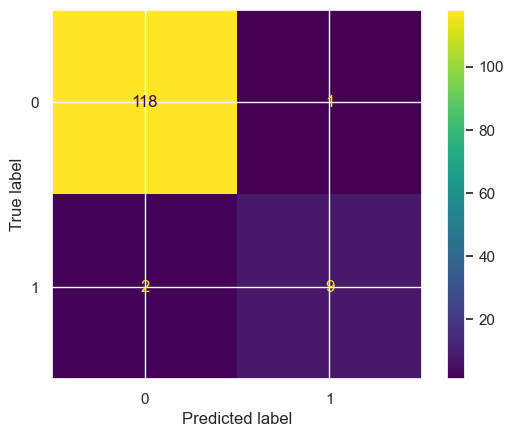

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matrix_2)
cm_display.plot()
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [14]:
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_test_pred)
print('exactitud:',exactitud)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_test_pred, average= None)
print('precision:',precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred, average= None)
print('recall:',recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred, average= None)
print('f1_score:',f1, type(f1))

Accuracy promedio: 0.9744720662924353
Desviación estándar: 0.00871646114856611
exactitud: 0.9769230769230769
precision: [0.98333333 0.9       ]
recall: [0.99159664 0.81818182]
f1_score: [0.9874477  0.85714286] <class 'numpy.ndarray'>


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

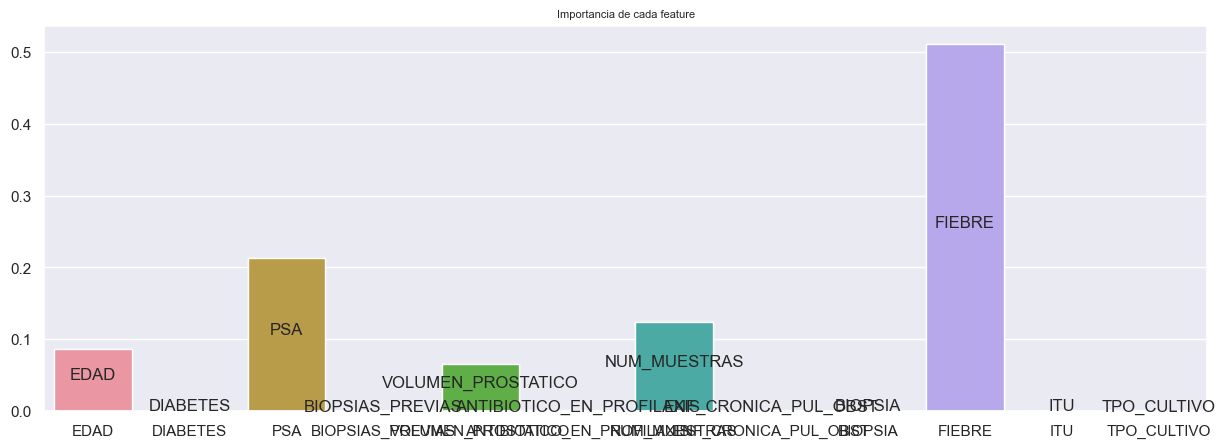

In [15]:
plt.figure(figsize = (15,5))
importances = model.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
ax = sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 8)
# Agregar etiquetas centradas en el eje X
for i in range(len(importances)):
    ax.text(i, importances[i]/2, columns[i], ha="center")
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Completado: 100.0%


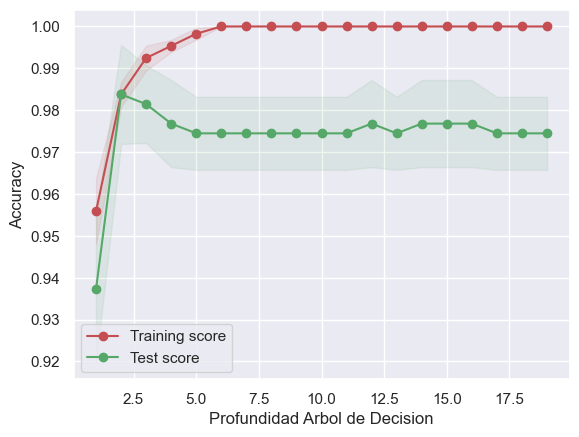

In [16]:
# Ajustar y evaluar un modelo de árbol de decisión con diferentes profundidades utilizando la técnica de validación cruzada.
# Se utiliza un bucle for para ajustar un modelo de árbol de decisión con diferentes profundidades (entre 1 y 20) utilizando max_depth. 
# Se utiliza cross_validate() para realizar validación cruzada de 5 pliegues y obtener la precisión del modelo en los sets de entrenamiento y prueba.
from sklearn.model_selection import cross_validate
from IPython.display import clear_output
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

# La gráfica muestra la precisión promedio del modelo en los datos de entrenamiento y prueba en función de la profundidad del árbol de decisión. 
# Se utiliza fill_between() para mostrar el rango de variabilidad de la precisión en los sets de train y test en función de la profundidad del árbol.
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

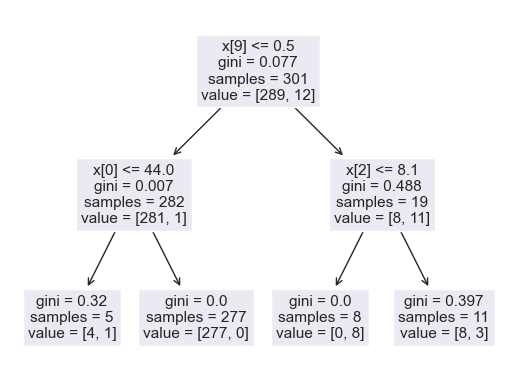

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth = 2)

tree.plot_tree(clf.fit(X_train,y_train))
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Ajustar y evaluar un modelo de árbol de decisión con diferentes profundidades utilizando la técnica de validación cruzada.
# Se utiliza un bucle for para ajustar un modelo de árbol de decisión con diferentes profundidades (entre 1 y 20) utilizando max_depth. 
# Se utiliza cross_validate() para realizar validación cruzada de 5 pliegues y obtener la precisión del modelo en los sets de entrenamiento y prueba.
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)



Completado: 100.0%


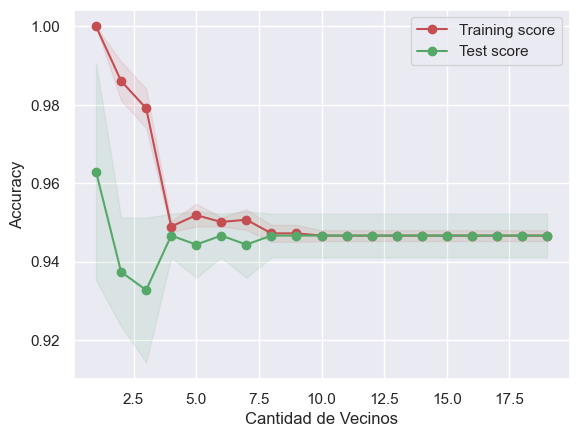

In [19]:
# La gráfica muestra la precisión promedio del modelo en los datos de entrenamiento y prueba en función de la profundidad del árbol de decisión. 
# Se utiliza fill_between() para mostrar el rango de variabilidad de la precisión en los sets de train y test en función de la profundidad del árbol.
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Encuentre el valor óptimo para k

In [20]:
K = 1

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

<Axes: >

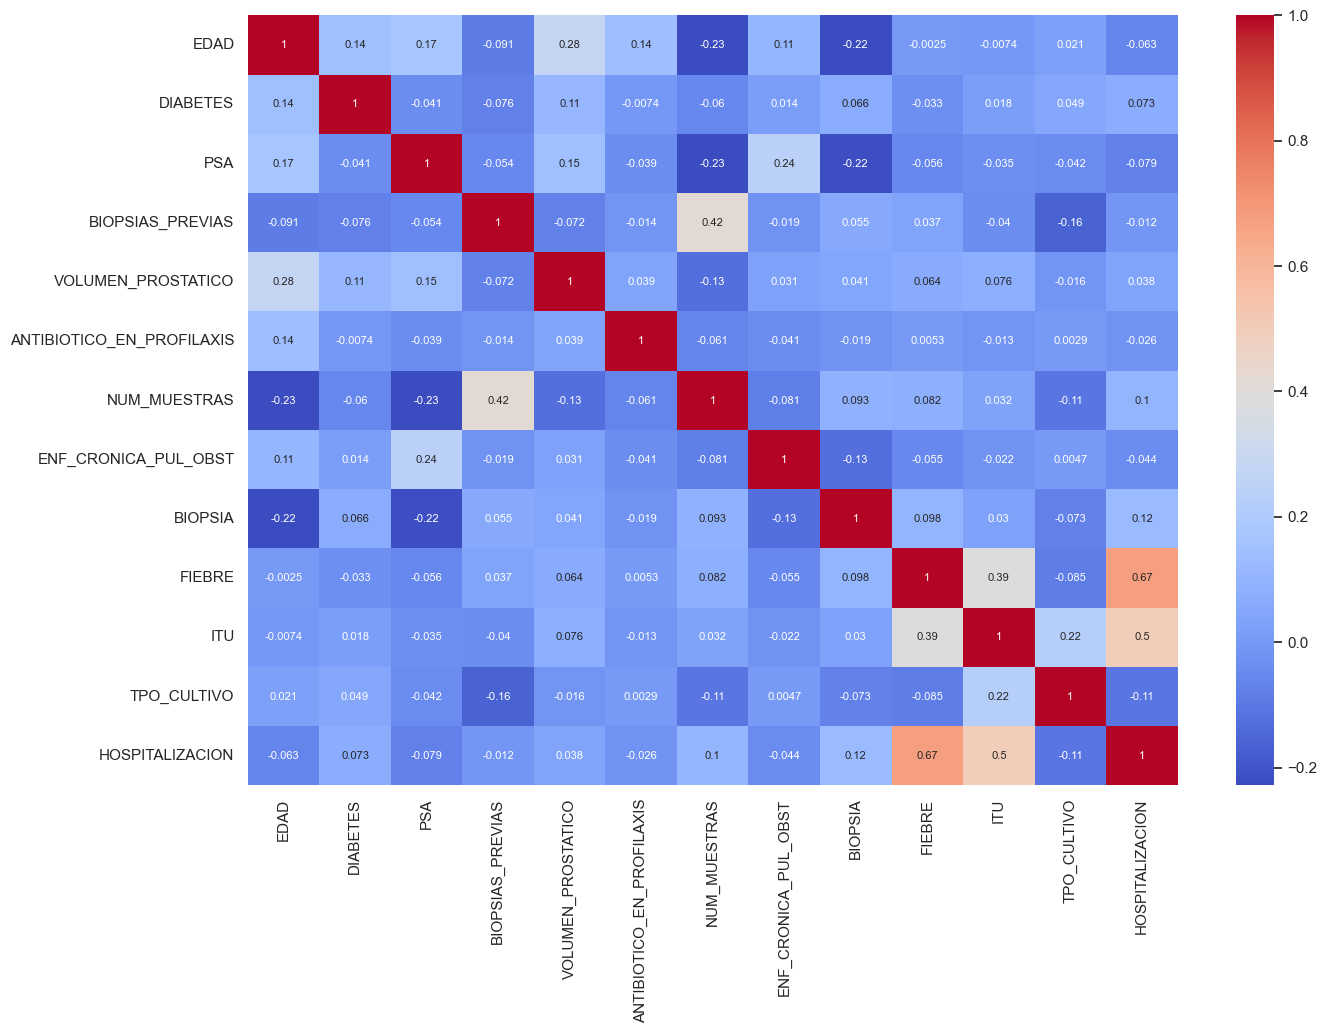

In [21]:
# Calcula la correlacion y grafica un Heatmap.
corr_matrix = df_num.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 8})

Voy a repetir los pasos mas importantes para las columnas con mayor coeficiente de Pearson.

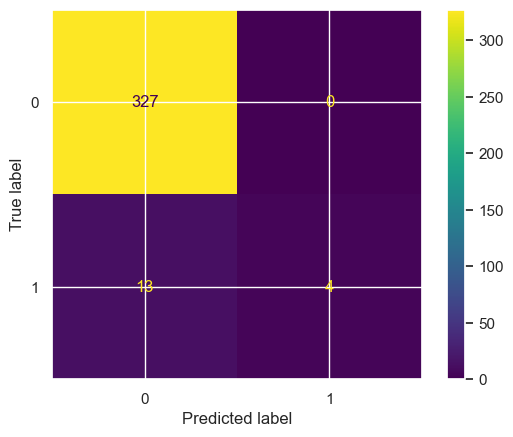

In [22]:
feature_cols = ['FIEBRE','ITU']
X = df_num[feature_cols]
y = df_num["HOSPITALIZACION"]

# Instanciamos un modelo de regresión lineal, entrenando el modelo y haciendo un `train_test_split`.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

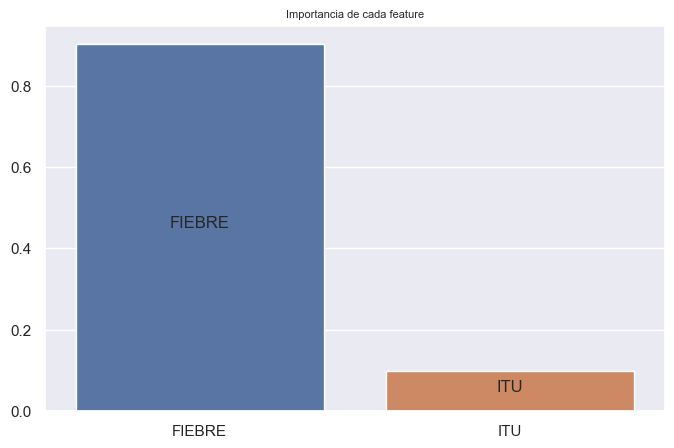

In [23]:
plt.figure(figsize = (8,5))
importances = model.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
ax = sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 8)
# Agregar etiquetas centradas en el eje X
for i in range(len(importances)):
    ax.text(i, importances[i]/2, columns[i], ha="center")
plt.show()

Dado que solo hay correlacion con una variable probemos con una regresion lineal

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

Text(0, 0.5, 'FIEBRE')

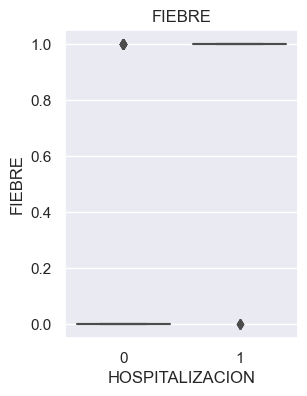

In [24]:
# Detecta distribuciones con boxplot
plt.figure(figsize = (3,4))
sns.boxplot(data=df_num,x=df_num['HOSPITALIZACION'],y=df_num['FIEBRE'])
plt.title('FIEBRE', fontsize = 12)
plt.xlabel('HOSPITALIZACION')
plt.ylabel('FIEBRE')

In [25]:
df_num['FIEBRE'].describe()

count    431.000000
mean       0.083527
std        0.276998
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FIEBRE, dtype: float64

CONCLUSION: Si el paciente presenta complicacion infecciosa post biposia, es seguro que pasara a Hospitalizacion.
A continuacion aislo solo las variables de FIEBRE e ITU

R/

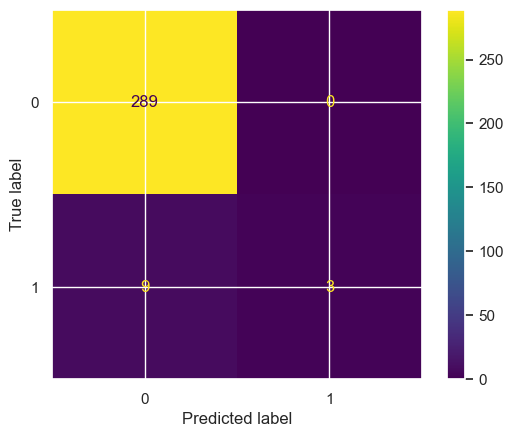

In [26]:
feature_cols = ['FIEBRE','ITU']
X = df_num[feature_cols]
y = df_num["HOSPITALIZACION"]

# Instanciamos un modelo de regresión lineal, entrenando el modelo y haciendo un `train_test_split`.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

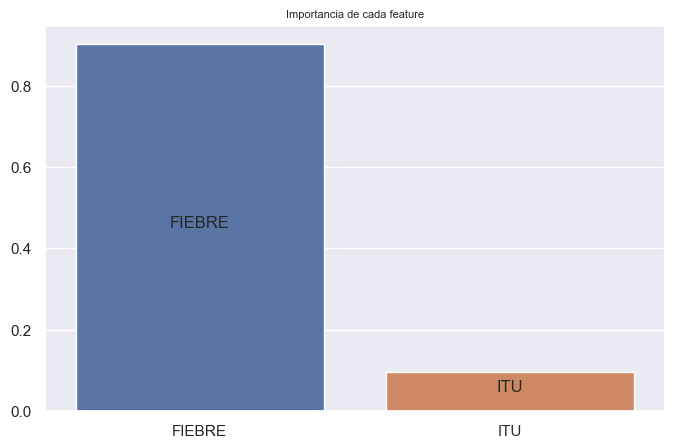

In [27]:
plt.figure(figsize = (8,5))
importances = model.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
ax = sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 8)
# Agregar etiquetas centradas en el eje X
for i in range(len(importances)):
    ax.text(i, importances[i]/2, columns[i], ha="center")
plt.show()

Conclusion: Si el paciente presenta complicacion infecciosa post biposia y fiebre, es seguro que pasara a Hospitalizacion.
Habria que probar balanceando los datos de Hospitalizacion.

In [28]:
feature_cols = ['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS', 'ENF_CRONICA_PUL_OBST', 'BIOPSIA', 'FIEBRE', 'ITU', 'TPO_CULTIVO']
X = df_num[feature_cols]
y = df_num["HOSPITALIZACION"]

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_nuevo = pca.fit_transform(X) 

# plt.scatter(X_nuevo[:,0], X[:,1], c = y)
# plt.show()

In [29]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

# Instanciamos el modelo y lo entrenamos
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train,y_train)

# Predecimos
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

# Evaluamos
print('MSE en train:', mean_squared_error(y_train,y_train_pred))
print('MSE en test:', mean_squared_error(y_test,y_test_pred))

MSE en train: 0.039173085785766025
MSE en test: 0.06861109286752971


In [30]:
regresor.feature_importances_

array([1.])

Probemos ahora con Oversampled a ver que cambia

In [31]:
df_OS = pd.read_csv('oversampled.csv', sep=",")

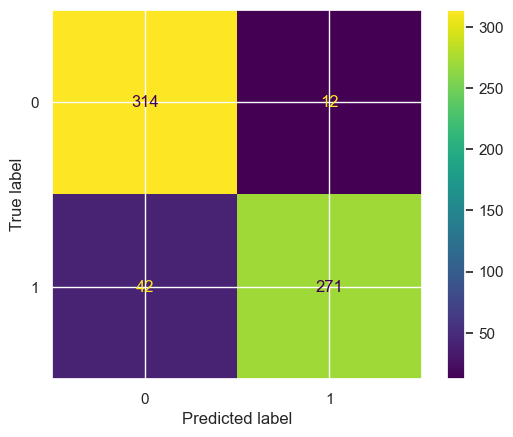

In [32]:
feature_cols = ['FIEBRE','ITU']
X = df_OS[feature_cols]
y = df_OS["HOSPITALIZACION"]

# Instanciamos un modelo de regresión lineal, entrenando el modelo y haciendo un `train_test_split`.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

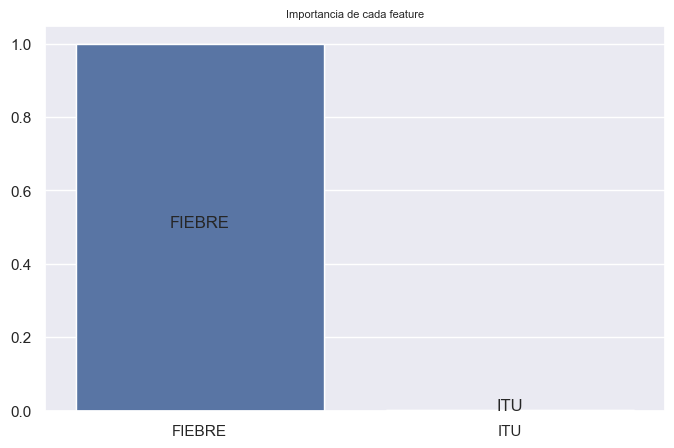

In [33]:
plt.figure(figsize = (8,5))
importances = model.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
ax = sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 8)
# Agregar etiquetas centradas en el eje X
for i in range(len(importances)):
    ax.text(i, importances[i]/2, columns[i], ha="center")
plt.show()

<Axes: >

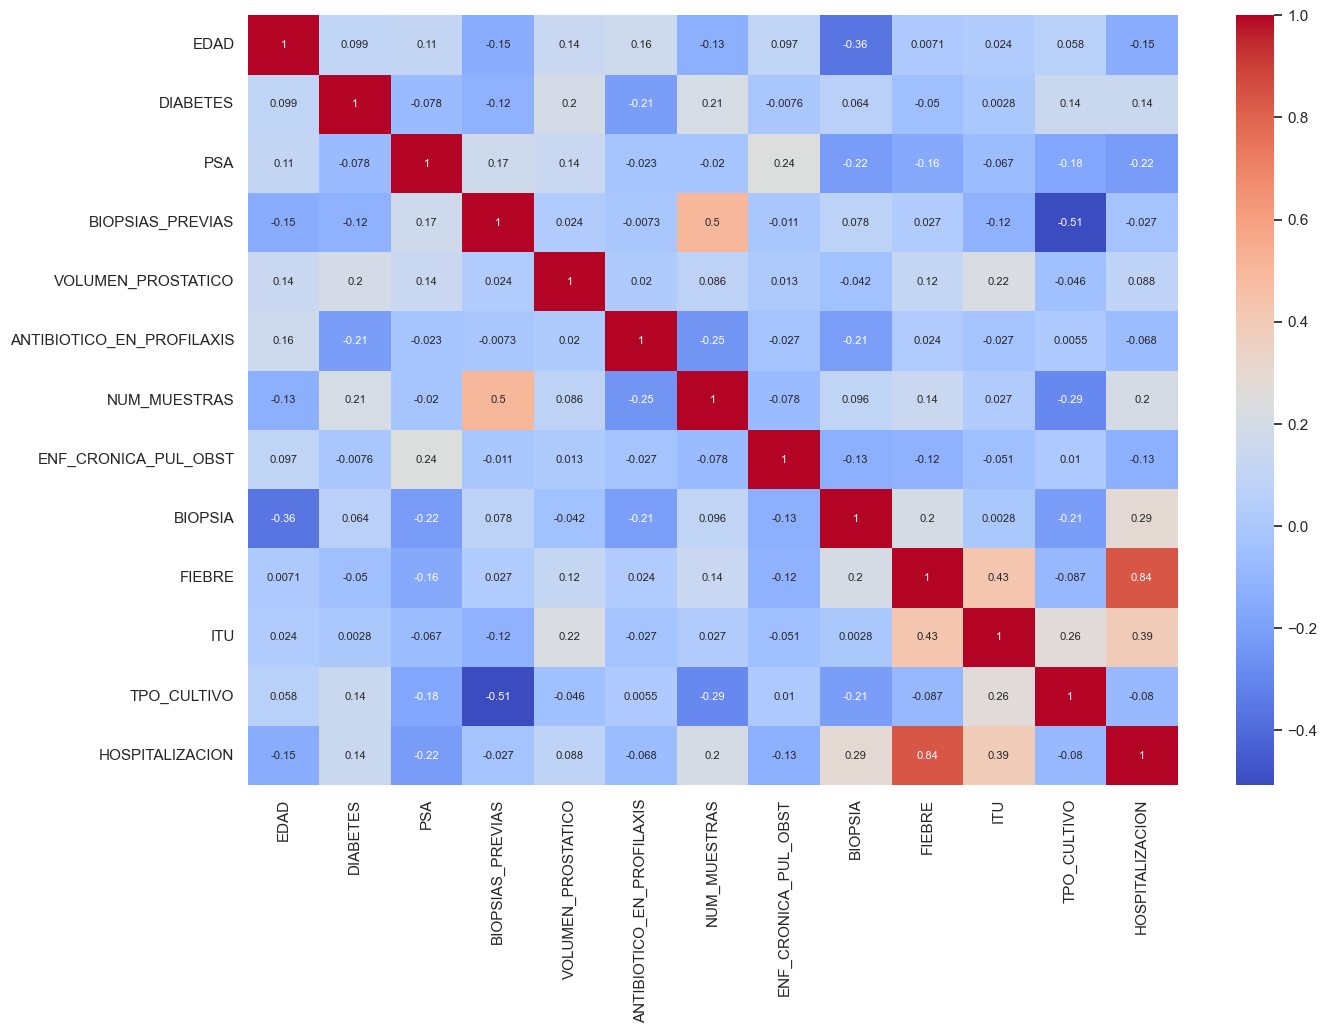

In [34]:
# Calcula la correlacion y grafica un Heatmap.
corr_matrix = df_OS.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 8})